In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as ke
import time

In [2]:
!wget http://chaladze.com/l5/img/Linnaeus%205%20256X256.rar
#5 classes: berry, bird, dog, flower, other (negative set)
#Images are 256x256 pixels, color (downsampled versions: 128X128, 64X64 and 32X32 pixels).
#1200 training images, 400 test images per class.

--2021-09-14 00:55:20--  http://chaladze.com/l5/img/Linnaeus%205%20256X256.rar
Resolving chaladze.com (chaladze.com)... 74.208.236.157, 2607:f1c0:100f:f000::25c
Connecting to chaladze.com (chaladze.com)|74.208.236.157|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454962798 (434M) [application/rar]
Saving to: ‘Linnaeus 5 256X256.rar’

Linnaeus 5 256X256. 100%[===================>] 433.89M   117MB/s    in 3.9s    

2021-09-14 00:55:24 (112 MB/s) - ‘Linnaeus 5 256X256.rar’ saved [454962798/454962798]



In [ ]:
!unrar x Linnaeus\ 5\ 256X256.rar

preprocesando el dataset llamando a una clase de tensorflow especializada para eso, asume cada carpeta como una clase

In [3]:
data_train = ke.preprocessing.image_dataset_from_directory("/content/Linnaeus 5 256X256/train",
                                                           batch_size=1000, image_size=(224,224), seed=777)

Found 6000 files belonging to 5 classes.


In [4]:
data_test = ke.preprocessing.image_dataset_from_directory("/content/Linnaeus 5 256X256/test",
                                                           batch_size=1000, image_size=(224,224), seed=777)

Found 2000 files belonging to 5 classes.


In [5]:
data_train.class_names

['berry', 'bird', 'dog', 'flower', 'other']

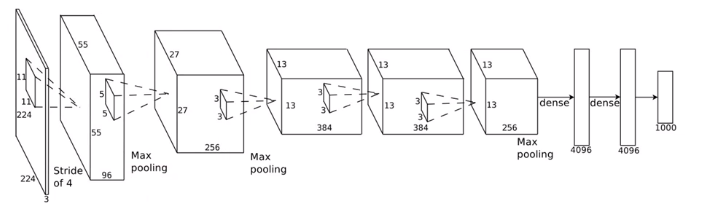

In [9]:
capa_entrada = ke.layers.Input(shape=(224,224,3))

capa_oculta = ke.layers.Rescaling(scale=1./255)(capa_entrada)

capa_oculta = ke.layers.Conv2D(96, (11,11), strides=4, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.BatchNormalization()(capa_oculta)
capa_oculta = ke.layers.MaxPool2D((3,3), strides=2)(capa_oculta)

capa_oculta = ke.layers.Conv2D(256, (5,5), padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.BatchNormalization()(capa_oculta)
capa_oculta = ke.layers.MaxPool2D((3,3), strides=2)(capa_oculta)

capa_oculta = ke.layers.Conv2D(384, (3,3), padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(384, (3,3), padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(256, (3,3), padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.MaxPool2D((3,3), strides=2)(capa_oculta)

capa_oculta = ke.layers.Flatten()(capa_oculta)

capa_oculta = ke.layers.Dense(4096, activation="relu")(capa_oculta)
capa_oculta = ke.layers.Dropout(0.5)(capa_oculta)

capa_oculta = ke.layers.Dense(4096, activation="relu")(capa_oculta)
capa_oculta = ke.layers.Dropout(0.5)(capa_oculta)

#capa_salida = ke.layers.Dense(1000, activation="relu")(capa_oculta) #esta es la original
capa_salida = ke.layers.Dense(5, activation="softmax")(capa_oculta) 

AlexNet = ke.models.Model(inputs=capa_entrada, outputs=capa_salida)
AlexNet.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_3 (Batch (None, 27, 27, 256)       1024

In [10]:
#STHOCASTIC GRADIEN DESCENT
optimizador = ke.optimizers.SGD(learning_rate=0.01, momentum=0.9)
AlexNet.compile(loss="sparse_categorical_crossentropy", optimizer=optimizador, metrics="accuracy")

In [11]:
t = time.time()
log = AlexNet.fit(data_train, epochs=25, validation_data=data_test)
print("minutos: ", (time.time()-t)/60)

Epoch 1/25
6/6 [==============================] - 30s 3s/step - loss: 2.0661 - accuracy: 0.2228 - val_loss: 1.6092 - val_accuracy: 0.2000
Epoch 2/25
6/6 [==============================] - 32s 3s/step - loss: 1.5513 - accuracy: 0.2897 - val_loss: 1.6035 - val_accuracy: 0.2310
Epoch 3/25
6/6 [==============================] - 33s 3s/step - loss: 1.4592 - accuracy: 0.3345 - val_loss: 1.6007 - val_accuracy: 0.2390
Epoch 4/25
6/6 [==============================] - 33s 3s/step - loss: 1.3664 - accuracy: 0.3993 - val_loss: 1.5927 - val_accuracy: 0.2445
Epoch 5/25
6/6 [==============================] - 33s 3s/step - loss: 1.2639 - accuracy: 0.4598 - val_loss: 1.5637 - val_accuracy: 0.3425
Epoch 6/25
6/6 [==============================] - 33s 3s/step - loss: 1.1866 - accuracy: 0.5037 - val_loss: 1.5543 - val_accuracy: 0.2965
Epoch 7/25
6/6 [==============================] - 33s 3s/step - loss: 1.1445 - accuracy: 0.5255 - val_loss: 1.5512 - val_accuracy: 0.3460
Epoch 8/25
6/6 [==================

In [12]:
def MostrarResuktados(modelo,log):
  plt.figure(figsize=(12,4))
  epochs = range(1,len(log.history["loss"])+1)

  plt.subplot(1,2,1)
  plt.plot(epochs,log.history["loss"], color="blue", label="error entrenamiento")
  plt.plot(epochs,log.history["val_loss"], color="red", label="error validation")

  plt.subplot(1,2,2)
  plt.plot(epochs,log.history["accuracy"], color="blue", label="accuracy entrenamiento")
  plt.plot(epochs,log.history["val_accuracy"], color="red", label="accuracy validation")

  plt.show()

  r = modelo.evaluate(data_test)

  print("Error: {:.2f} Accuracy: {:2%}".format( r[0], r[1]))

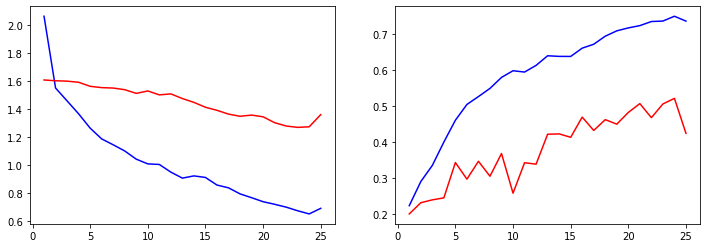

2/2 [==============================] - 5s 977ms/step - loss: 1.3607 - accuracy: 0.4235
Error: 1.36 Accuracy: 42.350000%


In [13]:
MostrarResuktados(AlexNet,log)

In [20]:
w, b = AlexNet.layers[2].get_weights()

In [21]:
w.shape

(11, 11, 3, 96)

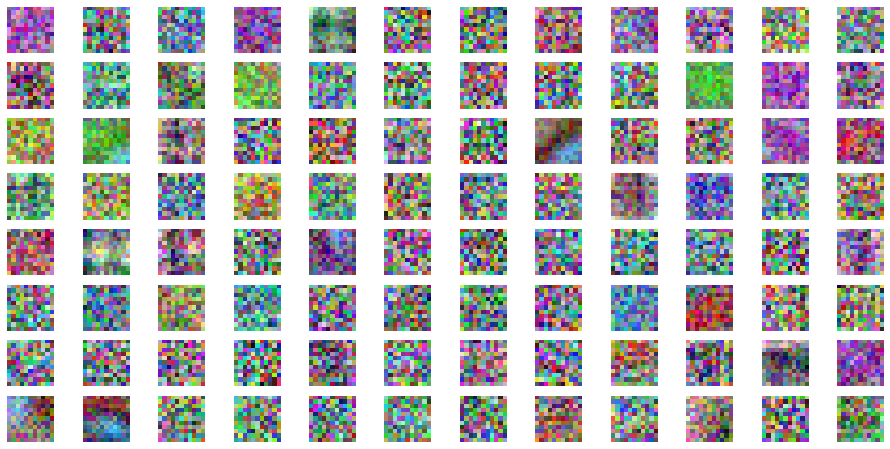

In [23]:
plt.figure(figsize=(16,8))
for i in range(96):
  plt.subplot(8,12,i+1)
  plt.axis("off")
  imagen = w[:,:,:,i]
  vmax=np.max(imagen)
  vmin=np.min(imagen)
  dist=(vmax-vmin)
  imagen = (imagen-vmin)/dist
  imagen = imagen*255
  plt.imshow(imagen.astype(np.uint8))

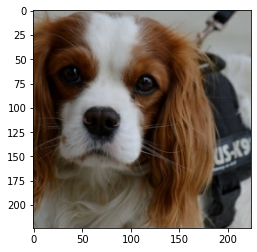

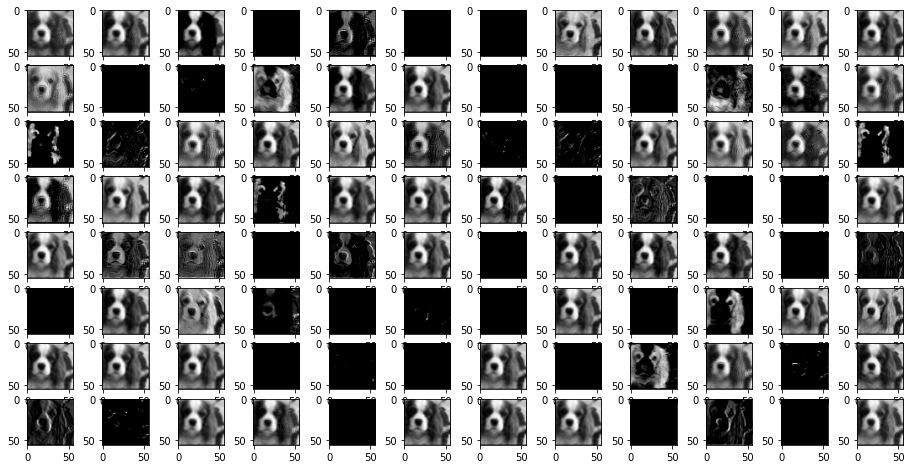

In [26]:
modelo_tmp = ke.models.Model(inputs = AlexNet.inputs, outputs=AlexNet.layers[3].output)

for x,y in data_test.take(1):
  plt.imshow(x[0].numpy().astype(np.uint8))
  act = modelo_tmp.predict(x[0:1])
  plt.figure(figsize=(16,8))
  for i in range(96):
    plt.subplot(8,12, i+1)
    plt.imshow(act[0,:,:,i], cmap="gray")

ZF-NET

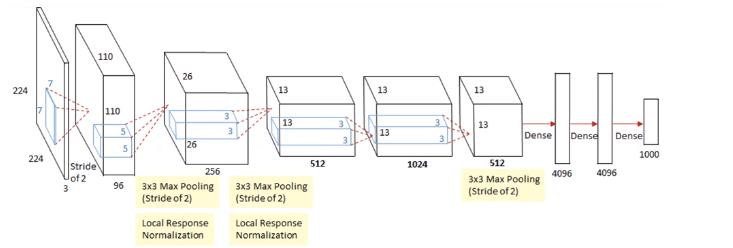

In [28]:
capa_entrada = ke.layers.Input(shape=(224,224,3))

capa_oculta = ke.layers.Rescaling(scale=1./255)(capa_entrada)

capa_oculta = ke.layers.Conv2D(96, (7,7), strides=2, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.BatchNormalization()(capa_oculta)
capa_oculta = ke.layers.MaxPool2D((3,3), strides=2)(capa_oculta)

capa_oculta = ke.layers.Conv2D(256, (5,5), padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.BatchNormalization()(capa_oculta)
capa_oculta = ke.layers.MaxPool2D((3,3), strides=2)(capa_oculta)

capa_oculta = ke.layers.Conv2D(512, (3,3), padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(1024, (3,3), padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(512, (3,3), padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.MaxPool2D((3,3), strides=2)(capa_oculta)

capa_oculta = ke.layers.Flatten()(capa_oculta)

capa_oculta = ke.layers.Dense(4096, activation="relu")(capa_oculta)
capa_oculta = ke.layers.Dropout(0.5)(capa_oculta)

capa_oculta = ke.layers.Dense(4096, activation="relu")(capa_oculta)
capa_oculta = ke.layers.Dropout(0.5)(capa_oculta)

#capa_salida = ke.layers.Dense(1000, activation="relu")(capa_oculta) #esta es la original
capa_salida = ke.layers.Dense(5, activation="softmax")(capa_oculta) 

ZFNet = ke.models.Model(inputs=capa_entrada, outputs=capa_salida)
ZFNet.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 96)      14208     
_________________________________________________________________
batch_normalization_6 (Batch (None, 112, 112, 96)      384       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 55, 55, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 55, 55, 256)       614656    
_________________________________________________________________
batch_normalization_7 (Batch (None, 55, 55, 256)       1024

In [31]:
#STHOCASTIC GRADIEN DESCENT
optimizador = ke.optimizers.SGD(learning_rate=0.01, momentum=0.9)
ZFNet.compile(loss="sparse_categorical_crossentropy", optimizer=optimizador, metrics="accuracy")

In [32]:
t = time.time()
log = ZFNet.fit(data_train, epochs=25, validation_data=data_test)
print("minutos: ", (time.time()-t)/60)

Epoch 1/25


ResourceExhaustedError: ignored